<a href="https://colab.research.google.com/github/Mohammednihal7/Data-Analysis/blob/main/Personal_Finance_Behavior_A_Data_Driven_Study(Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
#Impror the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [114]:
from google.colab import files
uploaded = files.upload()


Saving synthetic_personal_finance_dataset.csv to synthetic_personal_finance_dataset (3).csv


In [115]:
df = pd.read_csv("synthetic_personal_finance_dataset.csv")


In [116]:
df

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,09-01-2024
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,13-02-2022
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,12-05-2022
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,02-10-2023
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,07-08-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,2861.97,273669.70,Yes,Car,498400.74,120,6227.54,8.68,1.46,434,5.34,Europe,25-02-2024
32420,U32421,51,Female,Master,Employed,Student,5725.78,2861.97,17247.57,Yes,Home,83602.57,12,7605.13,16.50,1.33,453,0.25,North America,06-06-2025
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282.38,2861.97,22081.21,No,NaN,0.00,0,0.00,0.00,0.00,391,0.56,Other,20-07-2025
32422,U32423,36,Other,High School,Self-employed,Accountant,5035.99,2861.97,524039.88,No,NaN,0.00,0,0.00,0.00,0.00,596,8.67,Asia,07-06-2022


In [117]:
# Basic info
df.shape



(32424, 20)

In [118]:
# Basic info
df.columns


Index(['user_id', 'age', 'gender', 'education_level', 'employment_status',
       'job_title', 'monthly_income_usd', 'monthly_expenses_usd',
       'savings_usd', 'has_loan', 'loan_type', 'loan_amount_usd',
       'loan_term_months', 'monthly_emi_usd', 'loan_interest_rate_pct',
       'debt_to_income_ratio', 'credit_score', 'savings_to_income_ratio',
       'region', 'record_date'],
      dtype='object')

In [119]:
# Define the new column names
df.columns = [
    'user_id', 'age', 'gender', 'education', 'employment', 'job_title',
    'income', 'expenses', 'savings_life', 'has_loan', 'loan_type',
    'loan_amount', 'loan_term_months', 'monthly_emi', 'interest_rate_pct',
    'debt_income_ratio', 'credit_score', 'savings_income_ratio', 'region',
    'record_date'
]

In [120]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               32424 non-null  object 
 1   age                   32424 non-null  int64  
 2   gender                32424 non-null  object 
 3   education             32424 non-null  object 
 4   employment            32424 non-null  object 
 5   job_title             32424 non-null  object 
 6   income                32424 non-null  float64
 7   expenses              32424 non-null  float64
 8   savings_life          32424 non-null  float64
 9   has_loan              32424 non-null  object 
 10  loan_type             12995 non-null  object 
 11  loan_amount           32424 non-null  float64
 12  loan_term_months      32424 non-null  int64  
 13  monthly_emi           32424 non-null  float64
 14  interest_rate_pct     32424 non-null  float64
 15  debt_income_ratio  

In [121]:
# Convert 'record_date' column to datetime format
df['record_date'] = pd.to_datetime(df['record_date'], format='%d-%m-%Y')

# Extract the year from the 'record_date' and store it in a new column 'year'
df['year'] = df['record_date'].dt.year

# Extract the month from the 'record_date' and store it in a new column 'month'
df['month'] = df['record_date'].dt.month

# Extract the day from the 'record_date' and store it in a new column 'day'
df['day'] = df['record_date'].dt.day

df['loan_type'].head()

,loan_type
0,NaN
1,Education
2,NaN
3,Business
4,NaN


In [122]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)


Duplicate rows: 0


In [123]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 user_id                     0
age                         0
gender                      0
education                   0
employment                  0
job_title                   0
income                      0
expenses                    0
savings_life                0
has_loan                    0
loan_type               19429
loan_amount                 0
loan_term_months            0
monthly_emi                 0
interest_rate_pct           0
debt_income_ratio           0
credit_score                0
savings_income_ratio        0
region                      0
record_date                 0
year                        0
month                       0
day                         0
dtype: int64


In [124]:
# Fill missing loan_type only where user does not have a loan
df.loc[df['has_loan'] == 'No', 'loan_type'] = 'None'


In [125]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 user_id                 0
age                     0
gender                  0
education               0
employment              0
job_title               0
income                  0
expenses                0
savings_life            0
has_loan                0
loan_type               0
loan_amount             0
loan_term_months        0
monthly_emi             0
interest_rate_pct       0
debt_income_ratio       0
credit_score            0
savings_income_ratio    0
region                  0
record_date             0
year                    0
month                   0
day                     0
dtype: int64


In [126]:
df[['loan_type',"has_loan"]].head(20)

,loan_type,has_loan
0,None,No
1,Education,Yes
2,None,No
3,Business,Yes
4,None,No
5,Car,Yes
6,Car,Yes
7,None,No
8,None,No
9,Education,Yes


In [127]:
# Find rows where loan_type is 'None' but has_loan is not 'No'
inconsistencies = df[(df['loan_type'] == 'None') & (df['has_loan'] != 'No')]

# Display how many inconsistent rows exist
print(f"Inconsistent rows: {len(inconsistencies)}")


Inconsistent rows: 0


In [128]:
# Select object (text/categorical) columns
cat_cols = df.select_dtypes(include='object').columns

# Print unique values for each
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())



Column: user_id
['U00001' 'U00002' 'U00003' ... 'U32422' 'U32423' 'U32424']

Column: gender
['Female' 'Male' 'Other']

Column: education
['High School' 'PhD' 'Master' 'Bachelor' 'Other']

Column: employment
['Self-employed' 'Employed' 'Student' 'Unemployed']

Column: job_title
['Salesperson' 'Teacher' 'Manager' 'Student' 'Accountant' 'Doctor'
 'Unemployed' 'Driver' 'Engineer']

Column: has_loan
['No' 'Yes']

Column: loan_type
['None' 'Education' 'Business' 'Car' 'Home']

Column: region
['Other' 'North America' 'Africa' 'Europe' 'Asia']


In [129]:
df

,user_id,age,gender,education,employment,job_title,income,expenses,savings_life,has_loan,...,monthly_emi,interest_rate_pct,debt_income_ratio,credit_score,savings_income_ratio,region,record_date,year,month,day
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,...,0.00,0.00,0.00,430,8.68,Other,2024-01-09,2024,1,9
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,4953.50,13.33,1.40,543,6.16,North America,2022-02-13,2022,2,13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,...,0.00,0.00,0.00,754,6.87,Africa,2022-05-12,2022,5,12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02,2023,10,2
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,...,0.00,0.00,0.00,516,7.50,Africa,2021-08-07,2021,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,2861.97,273669.70,Yes,...,6227.54,8.68,1.46,434,5.34,Europe,2024-02-25,2024,2,25
32420,U32421,51,Female,Master,Employed,Student,5725.78,2861.97,17247.57,Yes,...,7605.13,16.50,1.33,453,0.25,North America,2025-06-06,2025,6,6
32421,U32422,18,Female,Bachelor,Self-employed,Doctor,3282.38,2861.97,22081.21,No,...,0.00,0.00,0.00,391,0.56,Other,2025-07-20,2025,7,20
32422,U32423,36,Other,High School,Self-employed,Accountant,5035.99,2861.97,524039.88,No,...,0.00,0.00,0.00,596,8.67,Asia,2022-06-07,2022,6,7


 Project 1: "Shadow Debt Trap": Detecting Hidden Debt Risk Despite Good Credit Score

 **Problem Statement:**
Are there individuals who appear financially healthy on paper (high credit score) but are actually at risk due to extreme EMI and low savings?

**Justification:**
Credit score alone doesn’t reflect current cash flow pressure. EMI + savings + expenses give a clearer risk picture.

**Hypothesis:**
There exists a group of individuals with credit scores above 750 but a debt-to-income ratio above 0.5 and savings below 10%.

In [130]:
# task 1 Keep only people who currently have a loan
dft1 = df[df['has_loan'] == 'Yes']



In [131]:
  #task3 Monthly savings
  dft1['savings_month'] = dft1['income'] - dft1['expenses']
  dft1

/tmp/ipython-input-133669156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1['savings_month'] = dft1['income'] - dft1['expenses']


,user_id,age,gender,education,employment,job_title,income,expenses,savings_life,has_loan,...,interest_rate_pct,debt_income_ratio,credit_score,savings_income_ratio,region,record_date,year,month,day,savings_month
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,13.33,1.40,543,6.16,North America,2022-02-13,2022,2,13,1163.74
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,23.93,0.84,461,4.31,Europe,2023-10-02,2023,10,2,1454.76
5,U00006,62,Male,Master,Employed,Student,4051.00,2244.42,194901.41,Yes,...,22.21,9.43,718,4.01,North America,2025-02-12,2025,2,12,1806.58
6,U00007,22,Female,Master,Student,Accountant,983.69,332.62,37522.56,Yes,...,26.95,6.89,761,3.18,Asia,2024-06-01,2024,6,1,651.07
9,U00010,61,Male,Master,Employed,Student,5216.18,4369.36,203320.50,Yes,...,25.09,1.30,558,3.25,Asia,2024-11-23,2024,11,23,846.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32414,U32415,40,Female,Other,Employed,Manager,3736.25,2861.97,386006.46,Yes,...,8.55,3.40,545,8.61,Africa,2024-02-14,2024,2,14,874.28
32415,U32416,57,Female,PhD,Employed,Engineer,3579.84,2861.97,5003.49,Yes,...,7.01,0.97,775,0.12,Africa,2022-05-04,2022,5,4,717.87
32417,U32418,35,Female,Bachelor,Unemployed,Accountant,5763.30,2861.97,456106.80,Yes,...,25.50,0.67,619,6.59,Asia,2025-06-22,2025,6,22,2901.33
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,2861.97,273669.70,Yes,...,8.68,1.46,434,5.34,Europe,2024-02-25,2024,2,25,1404.90


In [132]:
# task 2This shows how much of their income they are saving
dft1['savings_rate_month'] = dft1['savings_month'] / dft1['income']
dft1

/tmp/ipython-input-3958438320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft1['savings_rate_month'] = dft1['savings_month'] / dft1['income']


,user_id,age,gender,education,employment,job_title,income,expenses,savings_life,has_loan,...,debt_income_ratio,credit_score,savings_income_ratio,region,record_date,year,month,day,savings_month,savings_rate_month
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,1.40,543,6.16,North America,2022-02-13,2022,2,13,1163.74,0.329510
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,0.84,461,4.31,Europe,2023-10-02,2023,10,2,1454.76,0.246784
5,U00006,62,Male,Master,Employed,Student,4051.00,2244.42,194901.41,Yes,...,9.43,718,4.01,North America,2025-02-12,2025,2,12,1806.58,0.445959
6,U00007,22,Female,Master,Student,Accountant,983.69,332.62,37522.56,Yes,...,6.89,761,3.18,Asia,2024-06-01,2024,6,1,651.07,0.661865
9,U00010,61,Male,Master,Employed,Student,5216.18,4369.36,203320.50,Yes,...,1.30,558,3.25,Asia,2024-11-23,2024,11,23,846.82,0.162345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32414,U32415,40,Female,Other,Employed,Manager,3736.25,2861.97,386006.46,Yes,...,3.40,545,8.61,Africa,2024-02-14,2024,2,14,874.28,0.233999
32415,U32416,57,Female,PhD,Employed,Engineer,3579.84,2861.97,5003.49,Yes,...,0.97,775,0.12,Africa,2022-05-04,2022,5,4,717.87,0.200531
32417,U32418,35,Female,Bachelor,Unemployed,Accountant,5763.30,2861.97,456106.80,Yes,...,0.67,619,6.59,Asia,2025-06-22,2025,6,22,2901.33,0.503415
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,2861.97,273669.70,Yes,...,1.46,434,5.34,Europe,2024-02-25,2024,2,25,1404.90,0.329258


In [133]:
dft1

,user_id,age,gender,education,employment,job_title,income,expenses,savings_life,has_loan,...,debt_income_ratio,credit_score,savings_income_ratio,region,record_date,year,month,day,savings_month,savings_rate_month
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,...,1.40,543,6.16,North America,2022-02-13,2022,2,13,1163.74,0.329510
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,...,0.84,461,4.31,Europe,2023-10-02,2023,10,2,1454.76,0.246784
5,U00006,62,Male,Master,Employed,Student,4051.00,2244.42,194901.41,Yes,...,9.43,718,4.01,North America,2025-02-12,2025,2,12,1806.58,0.445959
6,U00007,22,Female,Master,Student,Accountant,983.69,332.62,37522.56,Yes,...,6.89,761,3.18,Asia,2024-06-01,2024,6,1,651.07,0.661865
9,U00010,61,Male,Master,Employed,Student,5216.18,4369.36,203320.50,Yes,...,1.30,558,3.25,Asia,2024-11-23,2024,11,23,846.82,0.162345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32414,U32415,40,Female,Other,Employed,Manager,3736.25,2861.97,386006.46,Yes,...,3.40,545,8.61,Africa,2024-02-14,2024,2,14,874.28,0.233999
32415,U32416,57,Female,PhD,Employed,Engineer,3579.84,2861.97,5003.49,Yes,...,0.97,775,0.12,Africa,2022-05-04,2022,5,4,717.87,0.200531
32417,U32418,35,Female,Bachelor,Unemployed,Accountant,5763.30,2861.97,456106.80,Yes,...,0.67,619,6.59,Asia,2025-06-22,2025,6,22,2901.33,0.503415
32419,U32420,30,Female,High School,Employed,Salesperson,4266.87,2861.97,273669.70,Yes,...,1.46,434,5.34,Europe,2024-02-25,2024,2,25,1404.90,0.329258


In [134]:
# Step 3: Filter the shadow debt trap cases
shadow_trap = dft1[
    (dft1['credit_score'] > 750) &                      # high credit score
    (dft1['debt_income_ratio'] > 0.5) &                 # high debt burden
    (dft1['savings_income_ratio'] < 10)                # low savings
]


In [135]:
shadow_trap.columns
shadow_trap[["loan_amount","income",	"expenses", "savings_life","monthly_emi"]]

,loan_amount,income,expenses,savings_life,monthly_emi
6,296057.60,983.69,332.62,37522.56,6773.29
13,404941.02,5546.28,3630.24,453101.38,10823.31
64,70418.98,500.00,288.60,56868.63,3567.20
80,108255.25,5082.00,2734.06,582120.37,2724.30
101,447155.50,5754.20,4350.50,309260.01,20376.93
...,...,...,...,...,...
32300,299387.68,5105.47,3306.74,260568.16,10086.11
32314,400108.63,5676.98,1850.11,240962.37,6774.23
32315,457024.61,1572.03,1382.21,162569.80,17703.21
32331,294809.58,4662.38,1881.42,421485.68,3532.82


In [145]:
shadow_trap["age"].value_counts().sort_index()

,count
age,
18,38
19,34
20,36
21,31
22,39
23,25
24,36
25,41
26,38


In [172]:
# Define age bins and corresponding labels
age_bins = [17, 19, 29, 44, 59, 69]
age_labels = ['Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']

# Create the new 'age_group' column
shadow_trap['age_group'] = pd.cut(shadow_trap['age'], bins=age_bins, labels=age_labels)

/tmp/ipython-input-1276632255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shadow_trap['age_group'] = pd.cut(shadow_trap['age'], bins=age_bins, labels=age_labels)


In [174]:
shadow_trap["age_group"].value_counts()

,count
age_group,
Adult,545
Middle-aged,521
Senior,358
Young Adult,357
Teenager,72


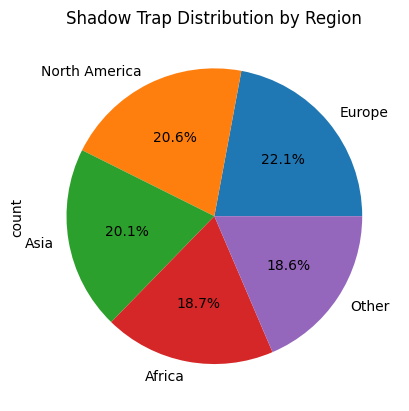

In [180]:
shadow_trap["region"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title('Shadow Trap Distribution by Region')
plt.show()

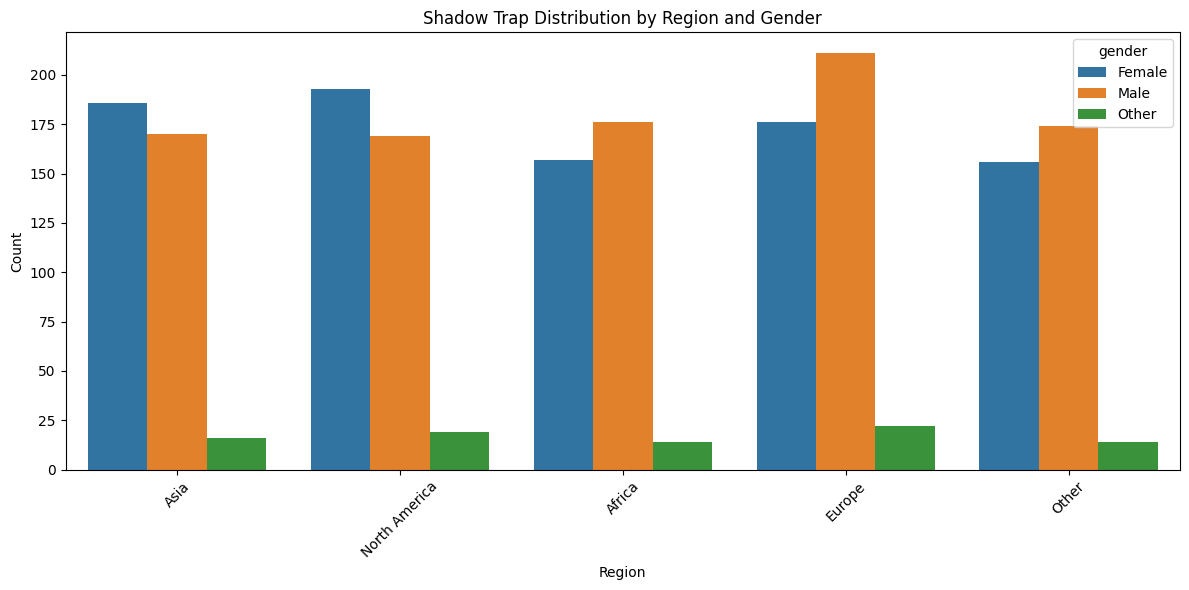

In [186]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shadow_trap, x='region', hue='gender')
plt.title('Shadow Trap Distribution by Region and Gender')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

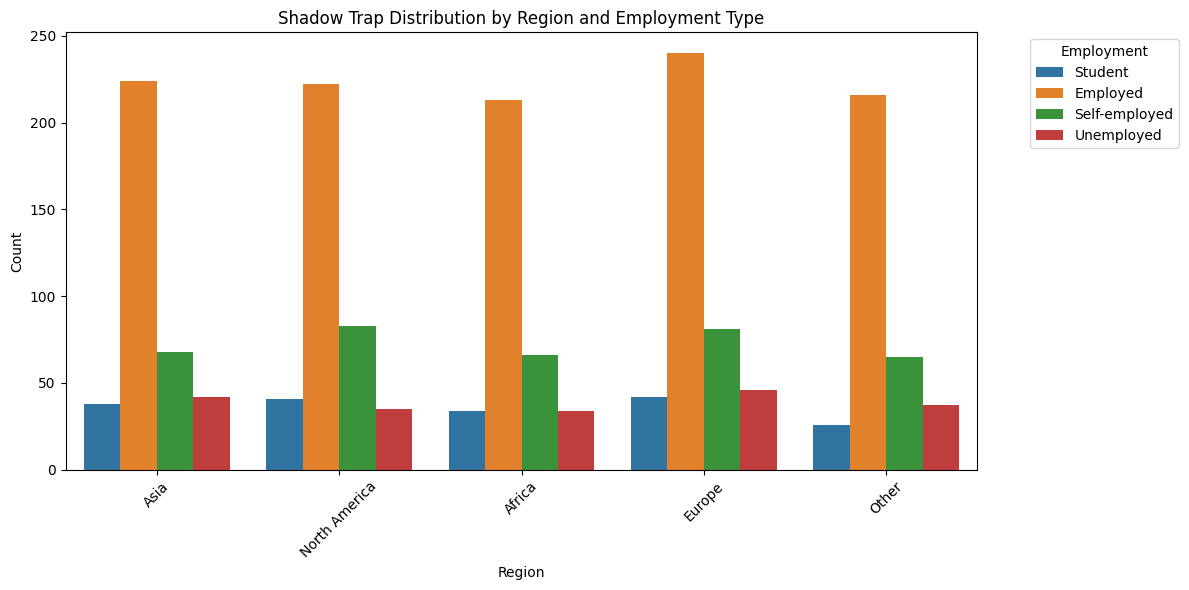

In [154]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shadow_trap, x='region', hue='employment')
plt.title('Shadow Trap Distribution by Region and Employment Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


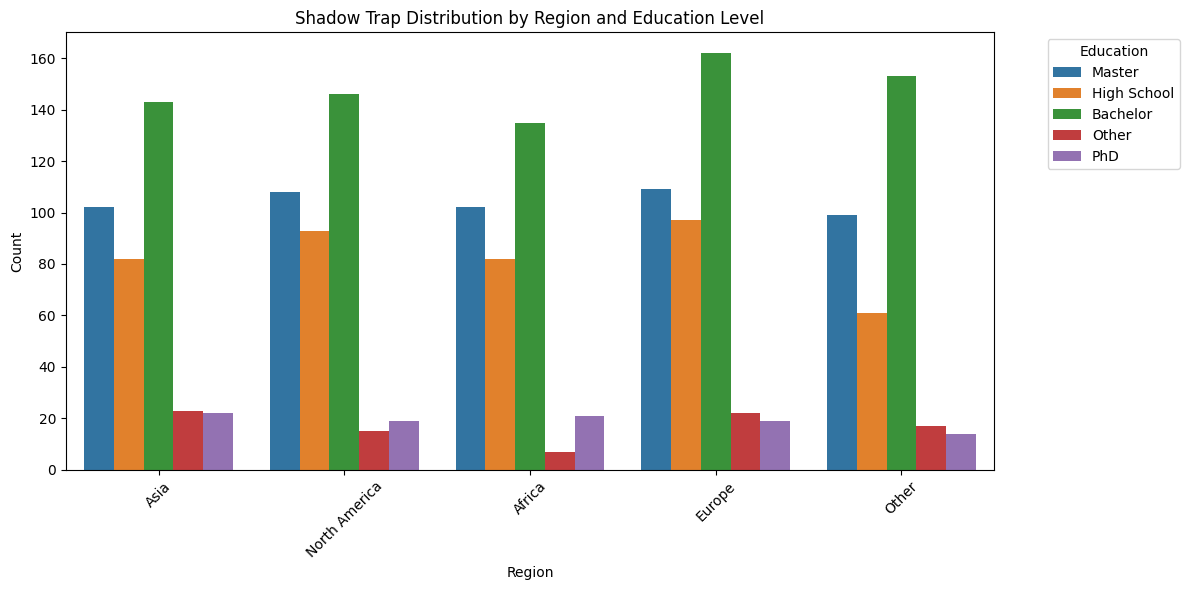

In [157]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shadow_trap, x='region', hue='education')
plt.title('Shadow Trap Distribution by Region and Education Level')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


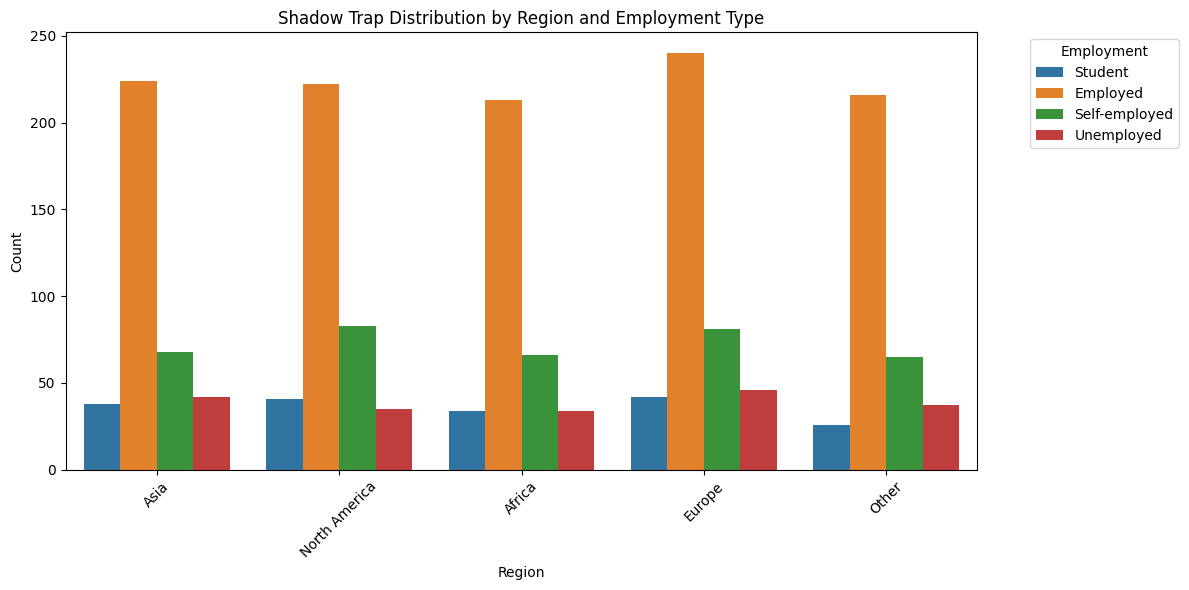

In [160]:
plt.figure(figsize=(12, 6))
sns.countplot(data=shadow_trap, x='region', hue='employment')
plt.title('Shadow Trap Distribution by Region and Employment Type')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [156]:
shadow_trap["region"].value_counts()

,count
region,
Europe,409
North America,381
Asia,372
Africa,347
Other,344
